In [1]:
pip install pydub

*italik metin*# Yeni Bölüm

In [2]:
pip install noisereduce

In [21]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import noisereduce as nr

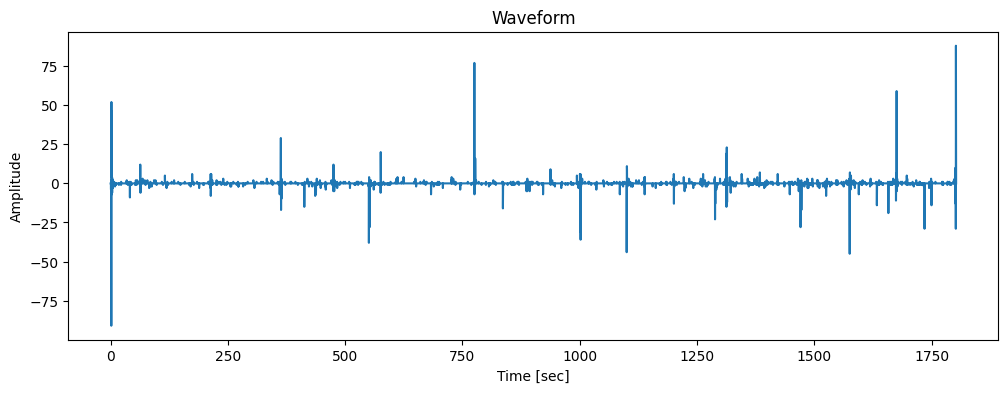

                 Time  Amplitude
0            0.000000          0
10815        0.225313          0
21630        0.450625          0
32446        0.675958         -4
43261        0.901271          2
...               ...        ...
86469633  1801.450708          7
86480448  1801.676021        -29
86491264  1801.901354         88
86502079  1802.126667         10
86512895  1802.352000          0

[8000 rows x 2 columns]


In [22]:
def create_noise_reduced_and_down_sampled_from_mp3(mp3_file, target_length):
    audio = AudioSegment.from_mp3(mp3_file)
    samples = np.array(audio.get_array_of_samples())

    sample_rate = audio.frame_rate
    reduced_noise_samples = nr.reduce_noise(y=samples, sr=sample_rate)
    time = np.linspace(0, len(reduced_noise_samples) / sample_rate, num=len(reduced_noise_samples))

    df = pd.DataFrame({
        'Time': time,
        'Amplitude': reduced_noise_samples
    })

    return df.iloc[np.linspace(0, len(df) - 1, target_length).astype(int)]


mp3_file = 'normal.mp3'
target_length = 8000

df_down_sampled = create_noise_reduced_and_down_sampled_from_mp3(mp3_file, target_length)

plt.figure(figsize=(12, 4))
plt.plot(df_down_sampled.Time, df_down_sampled.Amplitude)
plt.ylabel('Amplitude')
plt.xlabel('Time [sec]')
plt.title('Waveform')
plt.show()
print(df_down_sampled)

In [23]:

with open('normal.json', 'r') as file:
    data = json.load(file)

df_normal = pd.DataFrame(data)
df_10x = pd.concat([df_normal]*10, ignore_index=True)
print(df_normal)



                      time  temperature  vibration     tag
0      2023-12-09 21:07:00         26.0        111  Normal
1      2023-12-09 21:07:00         26.0        122  Normal
2      2023-12-09 21:07:00         26.0        143  Normal
3      2023-12-09 21:07:00         26.0        177  Normal
4      2023-12-09 21:07:00         26.0        180  Normal
...                    ...          ...        ...     ...
10972  2023-12-09 21:22:10         27.0        250  Normal
10973  2023-12-09 21:22:10         27.0        249  Normal
10974  2023-12-09 21:22:10         27.0        256  Normal
10975  2023-12-09 21:22:10         27.0        245  Normal
10976  2023-12-09 21:22:10         27.0        253  Normal

[10977 rows x 4 columns]


In [24]:
def create_down_sampled_dataframe_from_mp3(mp3_file, target_length):
    audio = AudioSegment.from_mp3(mp3_file)
    samples = np.array(audio.get_array_of_samples())

    # sample_rate = audio.frame_rate
    # time = np.linspace(0, len(samples) / sample_rate, num=len(samples))

    df = pd.DataFrame({
        'sound': samples
    })

    return df.iloc[np.linspace(0, len(df) - 1, target_length).astype(int)]


In [26]:
normal_mp3 = 'normal.mp3'

df_normal_down_sampled = create_down_sampled_dataframe_from_mp3(normal_mp3, len(df_normal))
df_normal.reset_index(drop=True, inplace=True)
df_normal_down_sampled.reset_index(drop=True, inplace=True)

df_normal['sound'] = df_normal_down_sampled['sound']

In [27]:
with open('anomaly.json', 'r') as file2:
    anomaly_data = json.load(file2)

df_anomaly = pd.DataFrame(anomaly_data)
df_anomaly['tag'] = 'Anomaly'
df_anomaly_10x = pd.concat([df_anomaly]*10, ignore_index=True)
print(df_anomaly)


                     time  temperature  vibration      tag
0     2023-12-09 21:32:07          0.0        227  Anomaly
1     2023-12-09 21:32:07          0.0        207  Anomaly
2     2023-12-09 21:32:07          0.0        240  Anomaly
3     2023-12-09 21:32:07          0.0        225  Anomaly
4     2023-12-09 21:32:07          0.0        228  Anomaly
...                   ...          ...        ...      ...
3029  2023-12-09 21:36:18         33.0        242  Anomaly
3030  2023-12-09 21:36:18         33.0        236  Anomaly
3031  2023-12-09 21:36:18         33.0        243  Anomaly
3032  2023-12-09 21:36:18         33.0        227  Anomaly
3033  2023-12-09 21:36:18         33.0        232  Anomaly

[3034 rows x 4 columns]


In [28]:
anomaly_mp3 = 'anomaly.mp3'
df_anomaly_down_sampled = create_down_sampled_dataframe_from_mp3(anomaly_mp3, len(df_anomaly))

df_anomaly.reset_index(drop=True, inplace=True)
df_anomaly_down_sampled.reset_index(drop=True, inplace=True)

df_anomaly['sound'] = df_anomaly_down_sampled['sound']

In [29]:
combined_df = pd.concat([df_normal, df_normal,df_normal,df_anomaly, df_normal,df_anomaly], ignore_index=True)
json_str = combined_df.to_json(orient='records')
data = json.loads(json_str)
output = {"time": [], "vibration": [], "sound": [], "temperature": [], "tag": []}

for record in data:
    output["time"].append(record.get("time"))
    output["vibration"].append(record.get("vibration"))
    output["sound"].append(record.get("sound"))
    output["temperature"].append(record.get("temperature"))
    output["tag"].append(record.get("tag"))

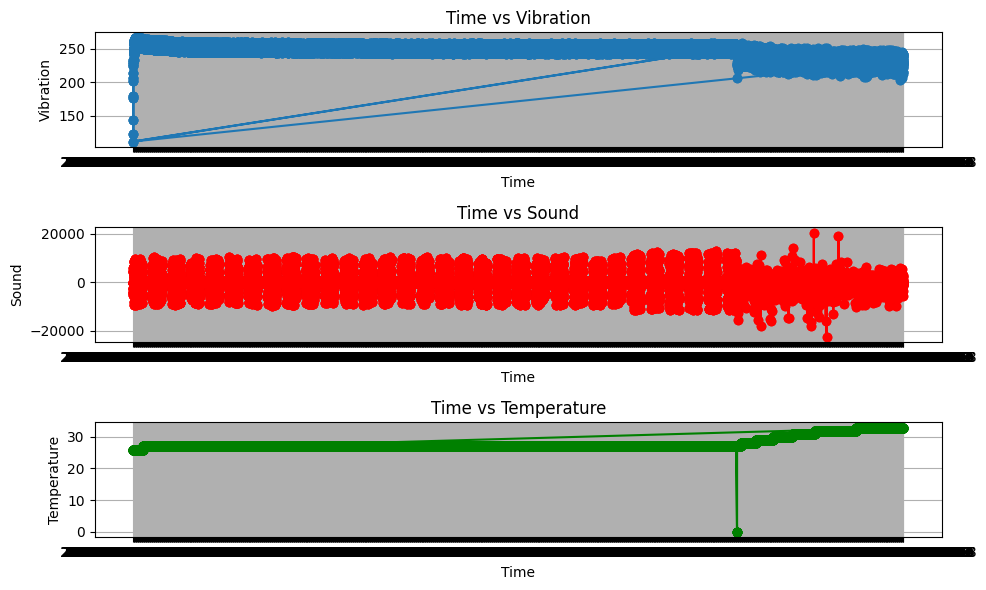

In [30]:

plt.figure(figsize=(10, 6))

# Vibration
plt.subplot(3, 1, 1)
plt.plot(output["time"], output["vibration"], marker='o', label='Vibration')
plt.xlabel('Time')
plt.ylabel('Vibration')
plt.title('Time vs Vibration')
plt.grid(True)

# Sound
plt.subplot(3, 1, 2)
plt.plot(output["time"], output["sound"], marker='o', color='red', label='Sound')
plt.xlabel('Time')
plt.ylabel('Sound')
plt.title('Time vs Sound')
plt.grid(True)

# Temperature
plt.subplot(3, 1, 3)
plt.plot(output["time"], output["temperature"], marker='o', color='green', label='Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Time vs Temperature')
plt.grid(True)

plt.tight_layout()
plt.show()

In [31]:
with open('data.json', 'w') as file:
    json.dump(output, file)